In [1]:
#Opened with --pylab flag
#Need to create code to analyze piot data
%pylab inline
import pandas as pd
import numpy as np
from scipy import io
import os
import glob

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Change this depending on computer used for analysis
## Laptop
#filepath = '/Users/frankkanayet/Dropbox/NLineExperiment/PilotData'
#filepath = '/Users/frankkanayet/Dropbox/NLineExperiment/PilotData/test3s'
#filepath = '/Users/frankkanayet/Google Drive/NLineData/Beh_Data'

## Desktop
filepath = '/Users/frankanayet/Google Drive/NLineData/Beh_Data'
os.chdir(filepath)

In [4]:
print 'Pandas version ' + pd.__version__

Pandas version 0.15.2


In [5]:
filenames = glob.glob('Nline_*.mat')
print filenames
#index to isolate subj numbers
data_dict = {}
for i in filenames:
    id1 = filenames[0].find('_') + 1
    id2 = filenames[0].find('-')
    sub_nbr = i[id1:id2]
    sub_name = i
    s_id = 's_'+sub_nbr
    data_dict[s_id] = io.loadmat(sub_name)

#sub_name = filenames[0] #This will be changed to a loop for all subjects later
#mat = io.loadmat(sub_name)
data_dict.keys()

['Nline_02001-Mar1615.mat', 'Nline_02002-Mar1915.mat', 'Nline_02003-Mar2015a.mat', 'Nline_02004-Mar2315a.mat', 'Nline_02005-Mar2315a.mat', 'Nline_02006-Mar2315a.mat', 'Nline_02007-Mar2415a.mat', 'Nline_02009-Mar2615a.mat', 'Nline_02010-Mar2615a.mat', 'Nline_02011-Mar2615a.mat', 'Nline_02012-Apr0215a.mat', 'Nline_02014-Apr0315a.mat', 'Nline_02015Apr2715a.mat', 'Nline_02016-Apr2715a.mat', 'Nline_02017-Apr2815a.mat', 'Nline_02018-Apr2815a.mat', 'Nline_02019-Apr2915a.mat', 'Nline_02020-May1815a.mat', 'Nline_02021-May2515a.mat', 'Nline_02022-May2515a.mat', 'Nline_02023-May2715a.mat', 'Nline_02024-May2815a.mat', 'Nline_02027-Jun0115a.mat']


['s_02009',
 's_02003',
 's_02002',
 's_02001',
 's_02007',
 's_02006',
 's_02005',
 's_02004',
 's_02018',
 's_02019',
 's_02010',
 's_02011',
 's_02012',
 's_02014',
 's_02015',
 's_02016',
 's_02017',
 's_02024',
 's_02027',
 's_02021',
 's_02020',
 's_02023',
 's_02022']

In [6]:
sub_ex = data_dict.keys()[0]

In [7]:
#data_dict['s_00011']['p']

In [8]:
#for i in data_dict:
#    data_dict[i].pop('__header__')
#    data_dict[i].pop('__version__')
#    data_dict[i].pop('__globals__')
#data_dict['s_00011'].keys()

In [9]:
## The indexes of zeros are as follows [0][0][x][y][z][0] The x y z are the 3 dimensions of the data 3d matrix the zeros are padding
data_dict[sub_ex]['p']['NlineResults'][0][0][0][5][0][0]
len(data_dict[sub_ex]['p']['NlineResults'][0][0][:])

49

In [10]:
data_dict[sub_ex]['p'].dtype.names

('ramp_up',
 'Mean_ITI',
 'Mean_hold',
 'decision',
 'consider',
 'runs',
 'nStim',
 'ntasks',
 'tasks',
 'trialSecs',
 'lineLength',
 'speed',
 'run_order',
 'NlineResults',
 'time_Runs',
 'task_transition',
 'start_Nline',
 'finish_Nline')

In [11]:
#Comment this out for include all subjects
data_dict.pop('s_02012')

{'__globals__': [],
 '__header__': 'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Apr  2 12:10:55 2015',
 '__version__': '1.0',
 'p': array([[ ([[14]], [[4.5]], [[4]], [[3]], [[0.5]], [[4]], [[16]], [[3]], [[array([u'Nline'], 
       dtype='<U5'), array([u'Negline'], 
       dtype='<U7'), array([u'Control'], 
       dtype='<U7')]], [[12]], [[1500]], [[6]], [[2, 3, 1], [2, 1, 3], [3, 1, 2], [1, 3, 2]], [[[array([u'Task'], 
       dtype='<U4'), array([u'Task'], 
       dtype='<U4'), array([u'Task'], 
       dtype='<U4'), array([u'Task'], 
       dtype='<U4')], [array([u'Probe'], 
       dtype='<U5'), array([u'Probe'], 
       dtype='<U5'), array([u'Probe'], 
       dtype='<U5'), array([u'Probe'], 
       dtype='<U5')], [array([u'Line_pct'], 
       dtype='<U8'), array([u'Line_pct'], 
       dtype='<U8'), array([u'Line_pct'], 
       dtype='<U8'), array([u'Line_pct'], 
       dtype='<U8')], [array([u'catch'], 
       dtype='<U5'), array([u'catch'], 
       dtype='<U5'), array([u'

In [12]:
cons_time = data_dict[sub_ex]['p']['consider'][0][0][0][0]
dec_time = data_dict[sub_ex]['p']['decision'][0][0][0][0]

In [13]:
new_dat = {}
#new_df = {}
for s in data_dict:
    tasks = ['NlineResults']
    new_dat[s]={}
    #new_df[s] = {}
    for task in tasks:
        dat = data_dict[s]['p'][task]
        num_fields = len(data_dict[s]['p'][task][0][0][0])
        dat_names = []
        for k in range(0,num_fields):
            dat_names.append(dat[0][0][0][k][0][0])
        new_dat[s][task] = {}
        runs = data_dict[s]['p']['runs'][0][0][0][0]
        for run in range(0,runs):
            run_name = 'Run_'+str(run)
            new_dat[s][task][run_name] = {}
            for i in range(0,len(dat_names)):
                new_dat[s][task][run_name][dat_names[i]] = []
                for j in range(0,len(dat[0][0][:])-1):
                    if dat_names[i] == 'catch_probe':
                        new_dat[s][task][run_name][dat_names[i]].append(dat[0][0][j+1][i][run])
                    elif dat_names[i] == 'Probe':
                        new_dat[s][task][run_name][dat_names[i]].append(dat[0][0][j+1][i][run][0])
                    else:
                        new_dat[s][task][run_name][dat_names[i]].append(dat[0][0][j+1][i][run][0][0])
#legible access to the data
Nline = 'NlineResults' #numberline

In [14]:
new_dat[sub_ex]['NlineResults']['Run_1'].keys()

[u'Slow',
 u'Line_pct',
 u'iti',
 u'TestX',
 u'ITI_onset_real',
 u'consider_onset_real',
 u'ITI_onset',
 u'RT',
 u'hold',
 u'decision_end',
 u'decision_onset_real',
 u'RTHold',
 u'decision_end_real',
 u'Correct',
 u'Wrong',
 u'BadPress',
 u'consider_onset',
 u'Response',
 u'Task',
 u'Trial',
 u'Points',
 u'Error',
 u'catch',
 u'mouse_pos',
 u'Block',
 u'catch_probe',
 u'Probe',
 u'hold_onset',
 u'Move',
 u'decision_onset',
 u'hold_onset_real',
 u'Click']

In [15]:
new_dat[sub_ex]['NlineResults']['Run_1']['Probe']

[u'he',
 u'my',
 u'it',
 u'me',
 u'as',
 u'ox',
 u'am',
 u'we',
 u'do',
 u'so',
 u'of',
 u'or',
 u'if',
 u'be',
 u'by',
 u'is',
 array([-94], dtype=int16),
 array([14], dtype=uint8),
 array([-34], dtype=int16),
 array([-44], dtype=int16),
 array([-86], dtype=int16),
 array([30], dtype=uint8),
 array([48], dtype=uint8),
 array([-10], dtype=int16),
 array([70], dtype=uint8),
 array([-28], dtype=int16),
 array([20], dtype=uint8),
 array([-58], dtype=int16),
 array([80], dtype=uint8),
 array([54], dtype=uint8),
 array([96], dtype=uint8),
 array([-78], dtype=int16),
 array([33], dtype=uint8),
 array([65], dtype=uint8),
 array([3], dtype=uint8),
 array([57], dtype=uint8),
 array([45], dtype=uint8),
 array([28], dtype=uint8),
 array([90], dtype=uint8),
 array([7], dtype=uint8),
 array([77], dtype=uint8),
 array([21], dtype=uint8),
 array([36], dtype=uint8),
 array([98], dtype=uint8),
 array([74], dtype=uint8),
 array([11], dtype=uint8),
 array([85], dtype=uint8),
 array([60], dtype=uint8)]

In [16]:
new_dat[sub_ex]['NlineResults']['Run_1']['catch_probe']

[array([u'he'], 
       dtype='<U2'), array([u'my'], 
       dtype='<U2'), array([u'it'], 
       dtype='<U2'), array([u'me'], 
       dtype='<U2'), array([u'of'], 
       dtype='<U2'), array([u'my'], 
       dtype='<U2'), array([u'am'], 
       dtype='<U2'), array([u'we'], 
       dtype='<U2'), array([u'do'], 
       dtype='<U2'), array([u'so'], 
       dtype='<U2'), array([u'of'], 
       dtype='<U2'), array([u'or'], 
       dtype='<U2'), array([u'if'], 
       dtype='<U2'), array([u'or'], 
       dtype='<U2'), array([u'by'], 
       dtype='<U2'), array([u'be'], 
       dtype='<U2'), array([], shape=(0, 0), dtype=uint8), array([], shape=(0, 0), dtype=uint8), array([], shape=(0, 0), dtype=uint8), array([], shape=(0, 0), dtype=uint8), array([], shape=(0, 0), dtype=uint8), array([], shape=(0, 0), dtype=uint8), array([], shape=(0, 0), dtype=uint8), array([], shape=(0, 0), dtype=uint8), array([], shape=(0, 0), dtype=uint8), array([], shape=(0, 0), dtype=uint8), array([], shape=(0, 0), dty

In [17]:
subj = data_dict.keys()
tasks = [Nline]
tuples = []
rows = len(data_dict[sub_ex]['p'][Nline][0][0][:])-1
for s in subj:
    runs = new_dat[s]['NlineResults'].keys()
    for run in runs:
        for i in range(0,rows):
            tuples.append((s, run, i))
len(tuples)
#iterables = [subj,tasks,runs]
indexes = pd.MultiIndex.from_tuples(tuples, names=['Subj', 'Run', 'Trial'])
nline_cols = len(new_dat[sub_ex][Nline]['Run_0'].keys())

In [18]:
indexes[90]

('s_02009', 'Run_2', 42)

In [19]:
indexes[1][1]

'Run_3'

In [20]:
varnames = new_dat[sub_ex][Nline]['Run_0'].keys()
varnames[24]

u'Block'

In [21]:
len(indexes)

4032

In [22]:
# Code empty cells of probes and catch_probes as Nan
Dic_list = []
probes = ['catch_probe']
for data in indexes:
    temp_dict = {}
    for var in varnames:
        if var == probes[0]:
            if len(new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]) == 0:
                new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]] = np.array([np.nan])
            temp_dict[var] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]][0]
        else:
            temp_dict[var] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]
    Dic_list.append(temp_dict)

In [23]:
#Create dataframe
nline_df = pd.DataFrame(Dic_list, index=indexes)
sum(nline_df.loc[sub_ex].loc['Run_0'].iloc[0:48]['catch'])

12

In [24]:
nline_df.loc[sub_ex].loc['Run_0'].iloc[0:10]['Error']

Trial
0       -0.023744
1       -0.025507
2        0.000000
3        0.000000
4       -0.027313
5        0.001938
6       -0.046035
7        0.000000
8        0.070881
9        0.026916
Name: Error, dtype: float64

In [25]:
nline_df.index.names = ['Subject', 'Run', 'Trial']
nline_df.index.names

FrozenList([u'Subject', u'Run', u'Trial'])

In [26]:
test = nline_df['Probe']
for i in range(0,len(test)):
    test[i] = np.ravel(test[i])
    test[i] = test[i][0]
nline_df['Probe'] = test
nline_df['Probe']

/Users/frankanayet/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/frankanayet/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Subject  Run    Trial
s_02009  Run_3  0        -44
                1         80
                2        -10
                3         14
                4         48
                5        -86
                6         54
                7        -94
                8        -58
                9         30
                10       -34
                11        70
                12       -78
                13        20
                14       -28
...
s_02022  Run_0  33        7
                34       11
                35       21
                36       90
                37       45
                38       60
                39       65
                40       85
                41       57
                42       74
                43        3
                44       36
                45       33
                46       98
                47       77
Name: Probe, Length: 4032, dtype: object

### Create Stim Labels

In [27]:
#now nline
#nline_df['Num'] = nline_df['Num'].map('{:.0f}'.format)
#nline_df['Denom'] = nline_df['Denom'].map('{:.0f}'.format)
#nline_df['Stim'] = nline_df['Num']+'/'+nline_df['Denom']
#nline_df['Stim']

In [28]:
nline_df.columns

Index([u'BadPress', u'Block', u'Click', u'Correct', u'Error', u'ITI_onset', u'ITI_onset_real', u'Line_pct', u'Move', u'Points', u'Probe', u'RT', u'RTHold', u'Response', u'Slow', u'Task', u'TestX', u'Trial', u'Wrong', u'catch', u'catch_probe', u'consider_onset', u'consider_onset_real', u'decision_end', u'decision_end_real', u'decision_onset', u'decision_onset_real', u'hold', u'hold_onset', u'hold_onset_real', u'iti', u'mouse_pos'], dtype='object')

# Number Line Analyses

### Accuracy & RT

In [29]:
nline_df['catch'].sum()

1008

In [30]:
nline_no_miss = nline_df[['Error', 'RT', 'RTHold', 'catch']]
nline_no_miss = nline_no_miss[nline_no_miss['catch']<1]
len(nline_no_miss)

3024

In [31]:
nline_no_miss = nline_no_miss.replace(-1, np.nan)
nline_no_miss.pop('catch')

Subject  Run    Trial
s_02009  Run_3  1        0
                2        0
                3        0
                5        0
                6        0
                7        0
                8        0
                9        0
                11       0
                12       0
                13       0
                15       0
                17       0
                18       0
                19       0
...
s_02022  Run_0  29       0
                30       0
                31       0
                33       0
                34       0
                36       0
                37       0
                38       0
                40       0
                41       0
                43       0
                44       0
                45       0
                46       0
                47       0
Name: catch, Length: 3024, dtype: int64

In [32]:
nline_no_miss['Missed'] = nline_no_miss['Error']
nline_no_miss['Missed'][nline_no_miss['Missed']<1] = 0
nline_missed = nline_no_miss['Missed']
nline_missed

Subject  Run    Trial
s_02009  Run_3  1        0
                2        0
                3        0
                5        0
                6        0
                7        0
                8        0
                9        0
                11       0
                12       0
                13       0
                15       0
                17       0
                18       0
                19       0
...
s_02022  Run_0  29       0
                30       0
                31       0
                33       0
                34       0
                36       0
                37       0
                38       0
                40       1
                41       0
                43       0
                44       0
                45       0
                46       0
                47       0
Name: Missed, Length: 3024, dtype: float64

In [33]:
nline_no_miss = nline_no_miss[nline_no_miss['Error']<1]
nline_no_miss['AbsError'] = np.abs(nline_no_miss['Error'])
nline_no_miss

Error        RT    RTHold  Missed  AbsError
Subject Run   Trial                                                
s_02009 Run_3 1     -0.056388  2.325869  0.462052       0  0.056388
              2     -0.009471  2.011655  0.648239       0  0.009471
              3     -0.017137  2.045767  0.502666       0  0.017137
              5     -0.012731  2.794526  0.526923       0  0.012731
              6     -0.032115  1.928430  0.448109       0  0.032115
              7      0.000837  2.646016  0.498345       0  0.000837
              8      0.019075  2.011882  0.542642       0  0.019075
              9     -0.024449  2.176008  0.732567       0  0.024449
              11    -0.052643  2.495735  0.586613       0  0.052643
              12     0.039780  2.842913  0.597258       0  0.039780
              13     0.032159  1.942424  0.449394       0  0.032159
              15     0.020000  1.725692  0.454650       0  0.020000
              17    -0.006123  2.028588  0.536987       0  0.006123
              18     0.008590  1.894971  0.380307       0  0.008590
              19    -0.025595  2.428051  0.458853       0  0.025595
              20     0.014449  2.176045  0.469045       0  0.014449
              21     0.003744  1.611656  0.396948       0  0.003744
              22    -0.003921  1.943663  0.383196       0  0.003921
              24    -0.001806  2.662367  0.556490       0  0.001806
              26    -0.000881  2.442966  0.551099       0  0.000881
              27    -0.000749  2.343055  0.548913       0  0.000749
              29     0.009692  2.576140  0.594083       0  0.009692
              30    -0.024493  2.159518  0.453022       0  0.024493
              31    -0.006388  2.661703  0.555826       0  0.006388
              32    -0.002115  2.061149  0.470935       0  0.002115
              34     0.022907  2.309477  0.367291       0  0.022907
              35    -0.018899  2.342407  0.519901       0  0.018899
              37     0.020000  1.761958  0.342875       0  0.020000
              38    -0.030000  1.895479  0.322675       0  0.030000
              39    -0.011278  2.845445  0.674254       0  0.011278
...                       ...       ...       ...     ...       ...
s_02022 Run_0 2      0.067313  2.225596  0.560898       0  0.067313
              4     -0.017841  2.476160  0.400226       0  0.017841
              5     -0.037269  2.875832  0.730898       0  0.037269
              7     -0.035903  2.125991  0.600105       0  0.035903
              8      0.099251  2.125778  0.374810       0  0.099251
              9      0.014053  2.392210  0.655383       0  0.014053
              11    -0.014097  2.242829  0.515816       0  0.014097
              14     0.066564  2.942616  0.726160       0  0.066564
              15    -0.032115  2.325759  0.748605       0  0.032115
              19     0.012467  2.175419  0.429164       0  0.012467
              22     0.001938  2.225851  0.540508       0  0.001938
              23     0.004802  1.912585  0.418059       0  0.004802
              24    -0.010529  1.892515  0.368022       0  0.010529
              25     0.007093  2.293039  0.495543       0  0.007093
              26    -0.011982  1.759498  0.429131       0  0.011982
              27     0.000132  2.159427  0.518998       0  0.000132
              29    -0.002115  2.861201  0.683983       0  0.002115
              30     0.003744  1.696309  0.448374       0  0.003744
              31     0.000837  2.759525  0.601917       0  0.000837
              33     0.086388  2.728577  0.738077       0  0.086388
              34     0.092643  2.361928  0.458283       0  0.092643
              36    -0.036564  2.358701  0.365513       0  0.036564
              37    -0.002863  2.362238  0.621707       0  0.002863
              38    -0.027313  1.878988  0.398332       0  0.027313
              41     0.002687  2.295595  0.756648       0  0.002687
              43    -0.018987  2.242642  0.519083       0  0.018987
            

#### How many trials missed?

In [34]:
nline_missed_subj = nline_missed.groupby(level=0)
nline_missed_subj.sum()

Subject
s_02001     1
s_02002     2
s_02003     7
s_02004     3
s_02005    17
s_02006     2
s_02007     1
s_02009     1
s_02010     7
s_02011     7
s_02014     7
s_02015     6
s_02016    10
s_02017    10
s_02018     4
s_02019     6
s_02020    12
s_02021     5
s_02022    18
s_02023     5
s_02024    10
s_02027     6
Name: Missed, dtype: float64

In [35]:
nline_no_miss_subj = nline_no_miss.groupby(level=0)
nline_no_miss_subj.mean()

,Error,RT,RTHold,Missed,AbsError
Subject,,,,,
s_02001,0.003776,2.154253,0.380134,0,0.024830
s_02002,-0.006059,2.000478,0.426307,0,0.037568
s_02003,0.002544,2.240014,0.480898,0,0.022472
s_02004,0.000621,2.181841,0.390107,0,0.020997
s_02005,-0.004826,2.378822,0.468106,0,0.021902
s_02006,-0.000487,1.970216,0.422093,0,0.026771
s_02007,-0.009034,2.117213,0.430258,0,0.027687
s_02009,-0.003768,2.240575,0.499304,0,0.019800
s_02010,-0.003834,1.801020,0.402272,0,0.034298


In [36]:
np.mean(nline_no_miss_subj.mean())

Error      -0.002280
RT          2.159062
RTHold      0.469918
Missed      0.000000
AbsError    0.027157
dtype: float64

In [37]:
nline_no_miss_subj.std()

,Error,RT,RTHold,Missed,AbsError
Subject,,,,,
s_02001,0.039698,0.390818,0.055008,0,0.031065
s_02002,0.110858,0.337475,0.060399,0,0.104379
s_02003,0.031955,0.366943,0.082894,0,0.022780
s_02004,0.030748,0.325082,0.097012,0,0.022400
s_02005,0.038741,0.317196,0.092952,0,0.032262
s_02006,0.049819,0.345187,0.135683,0,0.041957
s_02007,0.086780,0.252646,0.106627,0,0.082710
s_02009,0.029847,0.332101,0.105460,0,0.022590
s_02010,0.056356,0.358041,0.100827,0,0.044786


In [38]:
np.mean(nline_no_miss_subj.std())

Error       0.052857
RT          0.334081
RTHold      0.112639
Missed      0.000000
AbsError    0.044550
dtype: float64

How many trials did they actually respond?

In [39]:
nline_no_miss_subj.count()

,Error,RT,RTHold,Missed,AbsError
Subject,,,,,
s_02001,71,71,71,71,71
s_02002,70,70,70,70,70
s_02003,137,137,137,137,137
s_02004,141,141,141,141,141
s_02005,127,127,127,127,127
s_02006,142,142,142,142,142
s_02007,143,143,143,143,143
s_02009,143,143,143,143,143
s_02010,137,137,137,137,137


# RT Histograms

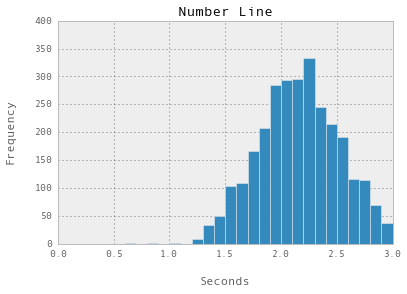

In [41]:
pd.options.display.mpl_style = 'default'
nline_no_miss['RT'].hist(bins=30, range=[0,3])
pylab.ylim([0,400])
pylab.title('Number Line')
pylab.xlabel('Seconds', labelpad = 18)
pylab.ylabel('Frequency', labelpad = 18)

## RTHold missed analysis

In [42]:
nline_miss = nline_df[['Error', 'RT', 'RTHold', 'catch', 'Task', 'Line_pct']]
nline_miss = nline_miss[nline_miss['catch']<1]
len(nline_miss)

3024

In [43]:
nline_miss['Missed'] = nline_miss['Error']
nline_miss['Missed'][nline_miss['Missed']<1] = 0
nline_miss

/Users/frankanayet/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


Error        RT    RTHold  catch  Task  Line_pct  \
Subject Run   Trial                                                        
s_02009 Run_3 1     -0.056388  2.325869  0.462052      0     2      0.90   
              2     -0.009471  2.011655  0.648239      0     2      0.45   
              3     -0.017137  2.045767  0.502666      0     2      0.57   
              5     -0.012731  2.794526  0.526923      0     2      0.07   
              6     -0.032115  1.928430  0.448109      0     2      0.77   
              7      0.000837  2.646016  0.498345      0     2      0.03   
              8      0.019075  2.011882  0.542642      0     2      0.21   
              9     -0.024449  2.176008  0.732567      0     2      0.65   
              11    -0.052643  2.495735  0.586613      0     2      0.85   
              12     0.039780  2.842913  0.597258      0     2      0.11   
              13     0.032159  1.942424  0.449394      0     2      0.60   
              15     0.020000  1.725692  0.454650      0     2      0.98   
              17    -0.006123  2.028588  0.536987      0     3      0.07   
              18     0.008590  1.894971  0.380307      0     3      0.65   
              19    -0.025595  2.428051  0.458853      0     3      0.03   
              20     0.014449  2.176045  0.469045      0     3      0.36   
              21     0.003744  1.611656  0.396948      0     3      0.45   
              22    -0.003921  1.943663  0.383196      0     3      0.57   
              24    -0.001806  2.662367  0.556490      0     3      0.33   
              26    -0.000881  2.442966  0.551099      0     3      0.60   
              27    -0.000749  2.343055  0.548913      0     3      0.21   
              29     0.009692  2.576140  0.594083      0     3      0.90   
              30    -0.024493  2.159518  0.453022      0     3      0.28   
              31    -0.006388  2.661703  0.555826      0     3      0.85   
              32    -0.002115  2.061149  0.470935      0     1      0.74   
              34     0.022907  2.309477  0.367291      0     1      0.90   
              35    -0.018899  2.342407  0.519901      0     1      0.77   
              37     0.020000  1.761958  0.342875      0     1      0.98   
              38    -0.030000  1.895479  0.322675      0     1      0.03   
              39    -0.011278  2.845445  0.674254      0     1      0.28   
...                       ...       ...       ...    ...   ...       ...   
s_02022 Run_0 8      0.099251  2.125778  0.374810      0     2      0.11   
              9      0.014053  2.392210  0.655383      0     2      0.03   
              10     1.000000 -1.000000  0.606026      0     2      0.85   
              11    -0.014097  2.242829  0.515816      0     2      0.60   
              14     0.066564  2.942616  0.726160      0     2      0.07   
              15    -0.032115  2.325759  0.748605      0     2      0.77   
              16     1.000000 -1.000000  0.576473      0     3      0.98   
              19     0.012467  2.175419  0.429164      0     3      0.21   
              21     1.000000 -1.000000  2.042793      0     3      0.90   
              22     0.001938  2.225851  0.540508      0     3      0.28   
              23     0.004802  1.912585  0.418059      0     3      0.33   
              24    -0.010529  1.892515  0.368022      0     3      0.57   
              25     0.007093  2.293039  0.495543      0     3      0.07   
              26    -0.011982  1.759498  0.429131      0     3      0.36   
              27     0.000132  2.159427  0.518998      0     3      0.11   
              29    -0.002115  2.861201  0.683983      0     3      0.74   
              30     0.003744  1.696309  0.448374      0     3      0.45   
              31     0.000837  2.759525  0.601917      0     3      0.03   
              33     0.086388  2.728577  0.738077      0     1      0.07   
              34     0.092643  2.361928  0.458283      0     1      0.11

In [44]:
nline_miss['AbsError'] = np.abs(nline_miss['Error'])

In [45]:
responded = nline_miss[nline_miss['Missed']==0]
#responded['Error'] = np.abs(responded['Error'])
len(responded)

2877

In [46]:
nline_miss = nline_miss[nline_miss['Missed']==1]
nline_miss

Error  RT    RTHold  catch  Task  Line_pct  Missed  \
Subject Run   Trial                                                       
s_02009 Run_0 22         1  -1  0.596069      0     2      0.07       1   
s_02003 Run_3 1          1  -1  0.510247      0     3      0.60       1   
        Run_2 20         1  -1  0.404079      0     3      0.74       1   
              23         1  -1  0.445901      0     3      0.33       1   
        Run_0 0          1  -1  1.083807      0     2      0.74       1   
              15         1  -1  0.504140      0     2      0.98       1   
              26         1  -1  0.573068      0     1      0.07       1   
              36         1  -1  0.538960      0     3      0.07       1   
s_02002 Run_0 9          1  -1  1.537010      0     2      0.28       1   
              29         1  -1  0.399618      0     1      0.11       1   
s_02001 Run_0 25         1  -1  0.399887      0     2      0.98       1   
s_02007 Run_3 24         1  -1  0.446265      0     1      0.85       1   
s_02006 Run_1 35         1  -1  0.282615      0     1      0.03       1   
        Run_0 12         1  -1  0.353787      0     3      0.60       1   
s_02005 Run_3 6          1  -1  0.430329      0     1      0.28       1   
              9          1  -1  0.469991      0     1      0.36       1   
              39         1  -1  0.363345      0     2      0.11       1   
        Run_2 13         1  -1  0.459736      0     2      0.07       1   
              22         1  -1  0.640726      0     3      0.85       1   
              47         1  -1  0.422893      0     1      0.33       1   
        Run_1 15         1  -1  0.374285      0     3      0.74       1   
              20         1  -1  0.546675      0     1      0.21       1   
              21         1  -1  0.489193      0     1      0.85       1   
              29         1  -1  0.399655      0     1      0.45       1   
        Run_0 0          1  -1  0.452760      0     1      0.07       1   
              7          1  -1  1.098877      0     1      0.11       1   
              20         1  -1  0.457945      0     2      0.98       1   
              32         1  -1  0.766867      0     3      0.90       1   
              34         1  -1  0.535520      0     3      0.21       1   
              36         1  -1  0.471375      0     3      0.45       1   
...                    ...  ..       ...    ...   ...       ...     ...   
s_02020 Run_1 46         1  -1  0.666018      0     1      0.11       1   
        Run_0 12         1  -1  0.582598      0     2      0.07       1   
              25         1  -1  0.590448      0     1      0.03       1   
              26         1  -1  1.373292      0     1      0.85       1   
              33         1  -1  0.698205      0     3      0.03       1   
              39         1  -1  0.817860      0     3      0.11       1   
              43         1  -1  0.552445      0     3      0.07       1   
s_02023 Run_1 3          1  -1  1.409563      0     3      0.03       1   
              26         1  -1  2.349073      0     1      0.36       1   
              46         1  -1  0.580922      0     2      0.74       1   
        Run_0 0          1  -1  1.863425      0     1      0.57       1   
              28         1  -1  0.445866      0     3      0.98       1   
s_02022 Run_3 4          1  -1  0.334887      0     1      0.74       1   
              5          1  -1  0.664845      0     1      0.85       1   
              9          1  -1  1.110430      0     1      0.57       1   
              14         1  -1  0.545540      0     1      0.11       1   
              20         1  -1  1.201521      0     3      0.57       1   
              27         1  -1  1.363706      0     3      0.07       1   
        Run_2 29         1  -1  0.837462      0     1      0.33       1   
              47         1  -1  1.219584      0     2      0.33       1   
        Run_1 3          1  -1  1.014998      

In [47]:
nline_miss_subj = nline_miss.groupby(level=0)
nline_miss_subj.mean()

,Error,RT,RTHold,catch,Task,Line_pct,Missed,AbsError
Subject,,,,,,,,
s_02001,1,-1,0.399887,0,2.000000,0.980000,1,1
s_02002,1,-1,0.968314,0,1.500000,0.195000,1,1
s_02003,1,-1,0.580029,0,2.428571,0.504286,1,1
s_02004,1,-1,0.371789,0,2.333333,0.513333,1,1
s_02005,1,-1,0.523442,0,1.882353,0.414118,1,1
s_02006,1,-1,0.318201,0,2.000000,0.315000,1,1
s_02007,1,-1,0.446265,0,1.000000,0.850000,1,1
s_02009,1,-1,0.596069,0,2.000000,0.070000,1,1
s_02010,1,-1,0.617966,0,2.142857,0.568571,1,1


In [48]:
nline_missed_subj.sum()

Subject
s_02001     1
s_02002     2
s_02003     7
s_02004     3
s_02005    17
s_02006     2
s_02007     1
s_02009     1
s_02010     7
s_02011     7
s_02014     7
s_02015     6
s_02016    10
s_02017    10
s_02018     4
s_02019     6
s_02020    12
s_02021     5
s_02022    18
s_02023     5
s_02024    10
s_02027     6
Name: Missed, dtype: float64

In [49]:
np.mean(nline_miss_subj.mean())

Error       1.000000
RT         -1.000000
RTHold      0.620057
catch       0.000000
Task        1.956341
Line_pct    0.487535
Missed      1.000000
AbsError    1.000000
dtype: float64

In [50]:
#dots_df.to_csv('Dots_data.csv', sep='\t')

In [51]:
responded_subj = responded.groupby(level=0)
responded_subj.mean()

,Error,RT,RTHold,catch,Task,Line_pct,Missed,AbsError
Subject,,,,,,,,
s_02001,0.003776,2.154253,0.380134,0,2.000000,0.483380,0,0.024830
s_02002,-0.006059,2.000478,0.426307,0,2.014286,0.528714,0,0.037568
s_02003,0.002544,2.240014,0.480898,0,1.978102,0.493212,0,0.022472
s_02004,0.000621,2.181841,0.390107,0,1.992908,0.493333,0,0.020997
s_02005,-0.004826,2.378822,0.468106,0,2.015748,0.504409,0,0.021902
s_02006,-0.000487,1.970216,0.422093,0,2.000000,0.496268,0,0.026771
s_02007,-0.009034,2.117213,0.430258,0,2.006993,0.491259,0,0.027687
s_02009,-0.003768,2.240575,0.499304,0,2.000000,0.496713,0,0.019800
s_02010,-0.003834,1.801020,0.402272,0,1.992701,0.489927,0,0.034298


In [52]:
np.mean(responded_subj.mean())

Error      -0.002280
RT          2.159062
RTHold      0.469918
catch       0.000000
Task        2.001453
Line_pct    0.494861
Missed      0.000000
AbsError    0.027157
dtype: float64

In [53]:
responded['RT_Diff'] = responded['RT']-responded['RTHold']

/Users/frankanayet/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [54]:
responded_subj = responded.groupby(level=0)
responded_subj.mean()

,Error,RT,RTHold,catch,Task,Line_pct,Missed,AbsError,RT_Diff
Subject,,,,,,,,,
s_02001,0.003776,2.154253,0.380134,0,2.000000,0.483380,0,0.024830,1.774119
s_02002,-0.006059,2.000478,0.426307,0,2.014286,0.528714,0,0.037568,1.574171
s_02003,0.002544,2.240014,0.480898,0,1.978102,0.493212,0,0.022472,1.759116
s_02004,0.000621,2.181841,0.390107,0,1.992908,0.493333,0,0.020997,1.791734
s_02005,-0.004826,2.378822,0.468106,0,2.015748,0.504409,0,0.021902,1.910716
s_02006,-0.000487,1.970216,0.422093,0,2.000000,0.496268,0,0.026771,1.548123
s_02007,-0.009034,2.117213,0.430258,0,2.006993,0.491259,0,0.027687,1.686955
s_02009,-0.003768,2.240575,0.499304,0,2.000000,0.496713,0,0.019800,1.741271
s_02010,-0.003834,1.801020,0.402272,0,1.992701,0.489927,0,0.034298,1.398747


## Plots by position

In [55]:
position_tasks = responded.groupby(['Task', 'Line_pct'])

In [56]:
responded.iloc[0:20]

Error        RT    RTHold  catch  Task  Line_pct  \
Subject Run   Trial                                                        
s_02009 Run_3 1     -0.056388  2.325869  0.462052      0     2      0.90   
              2     -0.009471  2.011655  0.648239      0     2      0.45   
              3     -0.017137  2.045767  0.502666      0     2      0.57   
              5     -0.012731  2.794526  0.526923      0     2      0.07   
              6     -0.032115  1.928430  0.448109      0     2      0.77   
              7      0.000837  2.646016  0.498345      0     2      0.03   
              8      0.019075  2.011882  0.542642      0     2      0.21   
              9     -0.024449  2.176008  0.732567      0     2      0.65   
              11    -0.052643  2.495735  0.586613      0     2      0.85   
              12     0.039780  2.842913  0.597258      0     2      0.11   
              13     0.032159  1.942424  0.449394      0     2      0.60   
              15     0.020000  1.725692  0.454650      0     2      0.98   
              17    -0.006123  2.028588  0.536987      0     3      0.07   
              18     0.008590  1.894971  0.380307      0     3      0.65   
              19    -0.025595  2.428051  0.458853      0     3      0.03   
              20     0.014449  2.176045  0.469045      0     3      0.36   
              21     0.003744  1.611656  0.396948      0     3      0.45   
              22    -0.003921  1.943663  0.383196      0     3      0.57   
              24    -0.001806  2.662367  0.556490      0     3      0.33   
              26    -0.000881  2.442966  0.551099      0     3      0.60   

                     Missed  AbsError   RT_Diff  
Subject Run   Trial                              
s_02009 Run_3 1           0  0.056388  1.863817  
              2           0  0.009471  1.363416  
              3           0  0.017137  1.543101  
              5           0  0.012731  2.267603  
              6           0  0.032115  1.480321  
              7           0  0.000837  2.147672  
              8           0  0.019075  1.469241  
              9           0  0.024449  1.443442  
              11          0  0.052643  1.909122  
              12          0  0.039780  2.245656  
              13          0  0.032159  1.493030  
              15          0  0.020000  1.271043  
              17          0  0.006123  1.491601  
              18          0  0.008590  1.514665  
              19          0  0.025595  1.969198  
              20          0  0.014449  1.707000  
              21          0  0.003744  1.214707  
              22          0  0.003921  1.560467  
              24          0  0.001806  2.105877  
              26          0  0.000881  1.891868

In [57]:
position_tasks['RT'].mean()

Task  Line_pct
1     0.03        2.158275
      0.07        2.282523
      0.11        2.269784
      0.21        2.261973
      0.28        2.265561
      0.33        2.122442
      0.36        2.214214
      0.45        1.851767
      0.57        1.946071
      0.60        1.957710
      0.65        2.034036
      0.74        2.190809
      0.77        2.238117
      0.85        2.333516
      0.90        2.286380
      0.98        2.220221
2     0.03        2.289421
      0.07        2.318665
      0.11        2.312457
      0.21        2.215401
      0.28        2.203804
      0.33        2.148017
      0.36        2.044164
      0.45        1.883373
      0.57        1.970618
      0.60        2.025999
      0.65        2.030102
      0.74        2.253328
      0.77        2.245914
      0.85        2.348132
      0.90        2.337295
      0.98        2.239650
3     0.03        2.275996
      0.07        2.313078
      0.11        2.317319
      0.21        2.239317
      0.28   

In [58]:
rts = position_tasks['RT'].mean()

In [59]:
error = position_tasks['AbsError'].mean()

In [60]:
rts.iloc[10]

2.0340359709837745

In [61]:
rts_1 = rts.iloc[0:16]
rts_2 = rts.iloc[16:32]
rts_3 = rts.iloc[32:48]
#rts_1 = rts.iloc[0:14]
#rts_2 = rts.iloc[14:30]
#rts_3 = rts.iloc[30:46]

In [62]:
error_1 = error.iloc[0:16]
error_2 = error.iloc[16:32]
error_3 = error.iloc[32:48]
#error_1 = error.iloc[0:14]
#error_2 = error.iloc[14:30]
#error_3 = error.iloc[30:46]

In [63]:
rts_1 = rts_1.get_values()
rts_2 = rts_2.get_values()
rts_3 = rts_3.get_values()

In [64]:
error_1 = error_1.get_values()
error_2 = error_2.get_values()
error_3 = error_3.get_values()

In [65]:
xvals = np.array([0.030, 0.070, 0.110, 0.210, 0.280, 0.330, 0.360, 0.450, 0.570, 0.600, 0.650, 0.740, 0.770, 0.850, 0.900, 0.980])
len(rts_1)
xvals1 = np.array([0.030, 0.070, 0.110, 0.210, 0.280, 0.330, 0.360, 0.450, 0.570, 0.600, 0.650, 0.740, 0.900, 0.980])

In [66]:
len(rts_3)

16

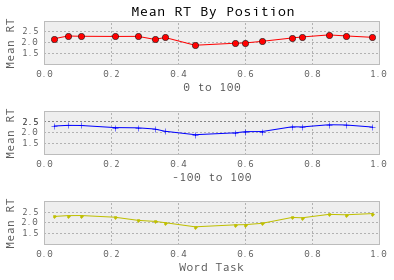

In [67]:
pylab.subplot(3,1,1)
pylab.plot(xvals, rts_1, 'ro-')
#pylab.plot(xvals1, rts_1, 'ro-')
pylab.title('Mean RT By Position')
pylab.xlabel('0 to 100', labelpad = 4)
pylab.ylabel('Mean RT')
pylab.ylim([1,3])
#pylab.ylim([0.8,3])
pylab.yticks(([1.5,2,2.5]))

pylab.subplot(3,1,2)
pylab.plot(xvals, rts_2, 'b+-')
pylab.xlabel('-100 to 100', labelpad = 4)
pylab.ylabel('Mean RT')
pylab.ylim([1,3])
#pylab.ylim([0.8,3])
pylab.yticks(([1.5,2,2.5,2.5]))

pylab.subplot(3,1,3)
pylab.plot(xvals, rts_3, 'y.-')
#pylab.plot(xvals1, rts_3, 'y.-')
pylab.xlabel('Word Task', labelpad = 4)
pylab.ylabel('Mean RT')
pylab.ylim([1,3])
#pylab.ylim([0.8,3])
pylab.yticks(([1.5,2,2.5]))

pylab.subplots_adjust(hspace = 1.1)


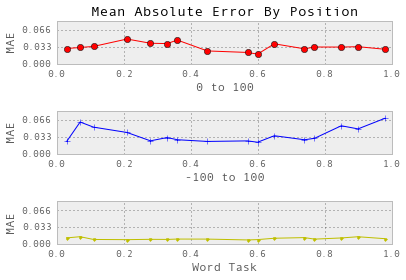

In [69]:
pylab.subplot(3,1,1)
pylab.plot(xvals, error_1, 'ro-')
#pylab.plot(xvals1, error_1, 'ro-')
pylab.title('Mean Absolute Error By Position')
pylab.xlabel('0 to 100', labelpad = 4)
pylab.ylabel('MAE')
pylab.ylim([0,0.085])
pylab.yticks(([0.0,0.033,0.066]))

pylab.subplot(3,1,2)
pylab.plot(xvals, error_2, 'b+-')
pylab.xlabel('-100 to 100', labelpad = 4)
pylab.ylabel('MAE')
pylab.ylim([0,0.085])
pylab.yticks(([0.0,0.033,0.066]))

pylab.subplot(3,1,3)
pylab.plot(xvals, error_3, 'y.-')
#pylab.plot(xvals1, error_3, 'y.-')
pylab.xlabel('Word Task', labelpad = 4)
pylab.ylabel('MAE')
pylab.ylim([0,0.085])
pylab.yticks(([0.0,0.033,0.066]))


pylab.subplots_adjust(hspace = 1.1)

###Signed error is calculated as Response - Correct

In [70]:
signerror = position_tasks['Error'].mean()
STDsignerror = position_tasks['Error'].std()
signerror_1 = signerror.iloc[0:16]
signerror_2 = signerror.iloc[16:32]
signerror_3 = signerror.iloc[32:48]
STDsignerror_1 = STDsignerror.iloc[0:16]
STDsignerror_2 = STDsignerror.iloc[16:32]
STDsignerror_3 = STDsignerror.iloc[32:48]
signerror_1 = signerror_1.get_values()
signerror_2 = signerror_2.get_values()
signerror_3 = signerror_3.get_values()
STDsignerror_1 = STDsignerror_1.get_values()
STDsignerror_2 = STDsignerror_2.get_values()
STDsignerror_3 = STDsignerror_3.get_values()

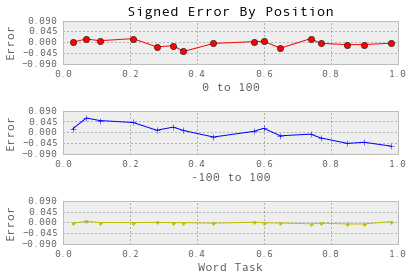

In [71]:
pylab.subplot(3,1,1)
pylab.plot(xvals, signerror_1, 'ro-')
#pylab.plot(xvals1, error_1, 'ro-')
pylab.title('Signed Error By Position')
pylab.xlabel('0 to 100', labelpad = 4)
pylab.ylabel('Error')
pylab.ylim([-0.09,0.09])
pylab.yticks(([-0.09,-0.045,0,0.045,0.09]))

pylab.subplot(3,1,2)
pylab.plot(xvals, signerror_2, 'b+-')
pylab.xlabel('-100 to 100', labelpad = 4)
pylab.ylabel('Error')
pylab.ylim([-0.09,0.09])
pylab.yticks(([-0.09,-0.045,0,0.045,0.09]))

pylab.subplot(3,1,3)
pylab.plot(xvals, signerror_3, 'y.-')
#pylab.plot(xvals1, error_3, 'y.-')
pylab.xlabel('Word Task', labelpad = 4)
pylab.ylabel('Error')
pylab.ylim([-0.09,0.09])
pylab.yticks(([-0.09,-0.045,0,0.045,0.09]))


pylab.subplots_adjust(hspace = 1.1)

## Positive values in the graph above mean participant overestimated, negative values mean participant underestimated. In the -/+ task participants tend to give answers further from the endpoints than they should (This might have to do with the fact that the line is divided in 200 units unlike + task).

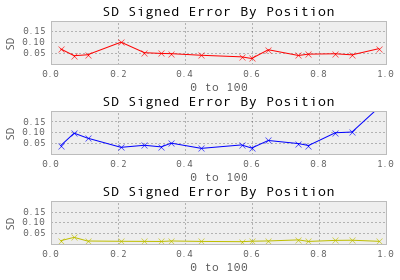

In [72]:
pylab.subplot(3,1,1)
pylab.plot(xvals, STDsignerror_1, 'rx-')
pylab.title('SD Signed Error By Position')
pylab.xlabel('0 to 100', labelpad = 4)
pylab.ylabel('SD')
pylab.ylim([0,0.2])
pylab.yticks(([0.05,0.1,0.15]))

pylab.subplot(3,1,2)
pylab.plot(xvals, STDsignerror_2, 'bx-')
pylab.title('SD Signed Error By Position')
pylab.xlabel('0 to 100', labelpad = 4)
pylab.ylabel('SD')
pylab.ylim([0,0.2])
pylab.yticks(([0.05,0.1,0.15]))

pylab.subplot(3,1,3)
pylab.plot(xvals, STDsignerror_3, 'yx-')
pylab.title('SD Signed Error By Position')
pylab.xlabel('0 to 100', labelpad = 4)
pylab.ylabel('SD')
pylab.ylim([0,0.2])
pylab.yticks(([0.05,0.1,0.15]))

pylab.subplots_adjust(hspace = 1.1)

In [73]:
#Basis to extract SD for each subject and then conduct average across subjects
position_tasks.get_group((1,0.03)).loc['s_02009']['Error'].std()

0.01017357302536785

In [74]:
D = {}
for sub in responded_subj.groups.keys():
    for pos in position_tasks.groups.keys():
        task = pos[0]
        stim = pos[1]
        if D.get(task,0) == 0:
            D[task] = {}
        if D[task].get(stim,0) == 0:
            D[task][stim] = []
        D[task][stim].append(position_tasks.get_group((task,stim)).loc[sub]['Error'].std())

In [75]:
for task in D:
    print task
    for stim in D[task]:
        D[task][stim] = np.nanmean(D[task][stim])

1
2
3


In [76]:
STDsignerror_1 = []
STDsignerror_2 = []
STDsignerror_3 = []
for stim in D[1]:
    STDsignerror_1.append(D[1][stim])
for stim in D[2]:
    STDsignerror_2.append(D[2][stim])
for stim in D[3]:
    STDsignerror_3.append(D[3][stim])

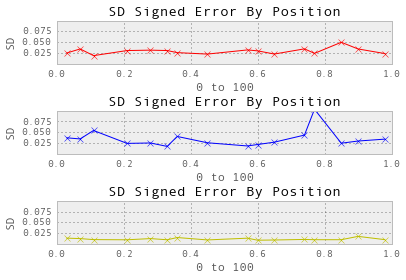

In [77]:
pylab.subplot(3,1,1)
pylab.plot(xvals, STDsignerror_1, 'rx-')
pylab.title('SD Signed Error By Position')
pylab.xlabel('0 to 100', labelpad = 4)
pylab.ylabel('SD')
pylab.ylim([0,0.11])
pylab.yticks(([0.025,0.05,0.075]))

pylab.subplot(3,1,2)
pylab.plot(xvals, STDsignerror_2, 'bx-')
pylab.title('SD Signed Error By Position')
pylab.xlabel('0 to 100', labelpad = 4)
pylab.ylabel('SD')
pylab.ylim([0,0.11])
pylab.yticks(([0.025,0.05,0.075]))

pylab.subplot(3,1,3)
pylab.plot(xvals, STDsignerror_3, 'yx-')
pylab.title('SD Signed Error By Position')
pylab.xlabel('0 to 100', labelpad = 4)
pylab.ylabel('SD')
pylab.ylim([0,0.11])
pylab.yticks(([0.025,0.05,0.075]))

pylab.subplots_adjust(hspace = 1.1)

In [78]:
D2 = {}
for sub in responded_subj.groups.keys():
    for pos in position_tasks.groups.keys():
        task = pos[0]
        stim = pos[1]
        if D2.get(task,0) == 0:
            D2[task] = {}
        if D2[task].get(stim,0) == 0:
            D2[task][stim] = []
        D2[task][stim].append(position_tasks.get_group((task,stim)).loc[sub]['Error'].mean())

In [94]:
#D2[3]

In [93]:
#probes = nline_df[['Task', 'Probe', 'Line_pct']]
#probes[probes['Probe']=='if']